In [1]:
import numpy as np
from src.dist import *
from src.kmeans import chop as kchop
from pychop import chop
from numpy import linalg as LA
from tqdm import tqdm


import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sample_seeds = [0, 42, 2024]
size = 2000
fontsize = 19

In [2]:
LOW_PREC = kchop(np.float16)
dimensions = [2, 10, 20, 40, 60]
dist1 = np.zeros((4, len(dimensions)))
dist2 = np.zeros((4, len(dimensions)))
err1 = np.zeros((4, len(dimensions)))

for i in tqdm(range(len(dimensions))):
    ii = dimensions[i]
    for seed in sample_seeds:
        np.random.seed(seed)
        data1 = np.random.normal(0, 1, size=(size, ii))
        data2 = np.random.normal(0, 5, size=(size, ii))
        data3 = np.random.normal(0, 10, size=(size, ii))
        data4 = np.random.normal(0, 20, size=(size, ii))

        data = [data1, data2, data3, data4]
        for d in range(4):
            dd = data[d]
            pd1 = pairwise_q1(dd, dd)
            pd2 = pairwise_q2(dd, dd)
            pd3 = pairwise_low_prec_q1(dd, dd, LOW_PREC)
            pd4 = pairwise_low_prec_q2(dd, dd, LOW_PREC)

            err1[d, i] +=  LA.norm(pd2 - pd1, 'fro')/(len(sample_seeds))
            dist1[d, i] += LA.norm(pd3 - pd1, 'fro')/(len(sample_seeds))
            dist2[d, i] += LA.norm(pd4 - pd1, 'fro')/(len(sample_seeds))


100%|██████████| 5/5 [05:40<00:00, 68.09s/it]


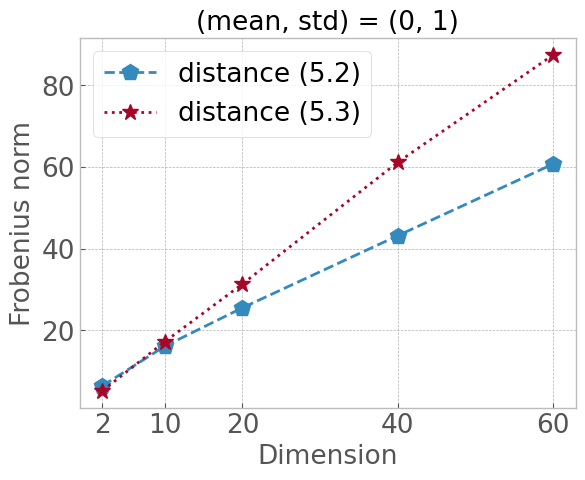

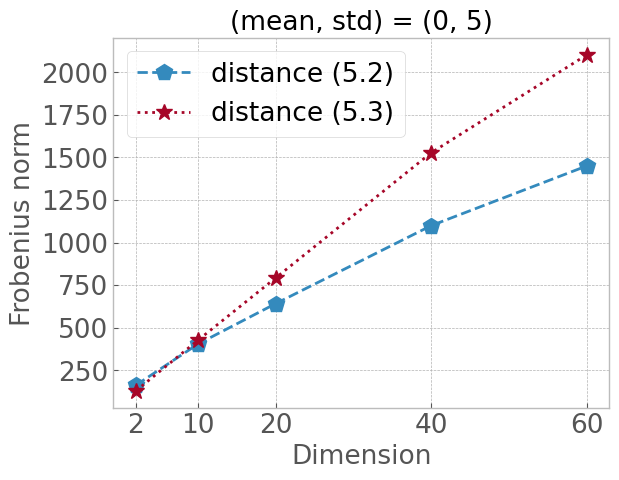

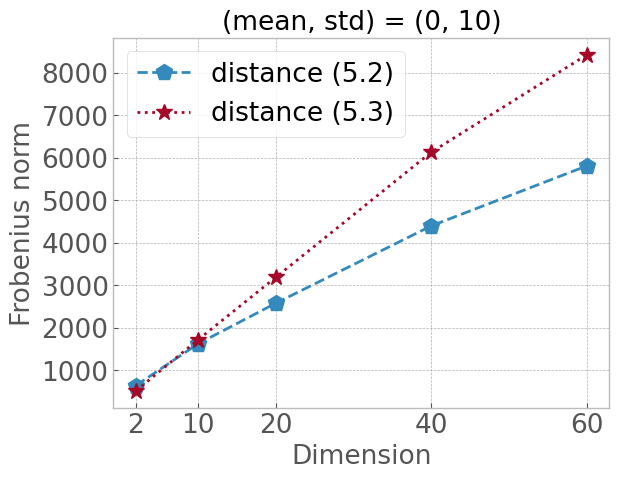

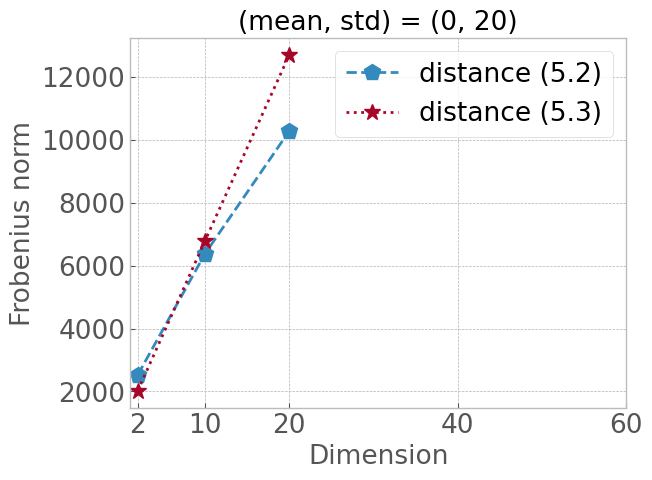

In [3]:
plt.style.use('ggplot')
plt.style.use('bmh')

titles = ['(mean, std) = (0, 1)', '(mean, std) = (0, 5)', '(mean, std) = (0, 10)', '(mean, std) = (0, 20)']
for j in range(4):
    plt.rcParams['axes.facecolor'] = 'white'
    plt.plot(dimensions, dist1[j, :], label='distance (5.2)', marker='p', linestyle='--', linewidth=2, markersize=12)
    plt.plot(dimensions, dist2[j, :], label='distance (5.3)', marker='*', linestyle=':', linewidth=2, markersize=12)
    plt.title(titles[j], fontsize=fontsize)
    plt.grid(True)
    plt.xticks(dimensions, fontsize=fontsize);
    plt.yticks(fontsize=fontsize);
    plt.legend(fontsize=fontsize)
    plt.xlabel("Dimension", fontsize=fontsize)
    plt.ylabel("Frobenius norm", fontsize=fontsize)
    plt.savefig('results/'+titles[j]+'_ft16.pdf')
    plt.show()

In [4]:
LOW_PREC = kchop(np.float32)

dimensions = [2, 10, 20, 40, 60]
dist1 = np.zeros((4, len(dimensions)))
dist2 = np.zeros((4, len(dimensions)))
err2 = np.zeros((4, len(dimensions)))

for i in tqdm(range(len(dimensions))):
    ii = dimensions[i]
    for seed in sample_seeds:
        np.random.seed(seed)
        data1 = np.random.normal(0, 1, size=(size, ii))
        data2 = np.random.normal(0, 5, size=(size, ii))
        data3 = np.random.normal(0, 10, size=(size, ii))
        data4 = np.random.normal(0, 20, size=(size, ii))

        data = [data1, data2, data3, data4]
        
        for d in range(4):
            dd = data[d]
            pd1 = pairwise_q1(dd, dd)
            pd2 = pairwise_q2(dd, dd)
            pd3 = pairwise_low_prec_q1(dd, dd, LOW_PREC)
            pd4 = pairwise_low_prec_q2(dd, dd, LOW_PREC)

            err2[d, i] +=  LA.norm(pd2 - pd1, 'fro')/(len(sample_seeds))
            dist1[d, i] += LA.norm(pd3 - pd1, 'fro')/(len(sample_seeds))
            dist2[d, i] += LA.norm(pd4 - pd1, 'fro')/(len(sample_seeds))


100%|██████████| 5/5 [02:40<00:00, 32.11s/it]


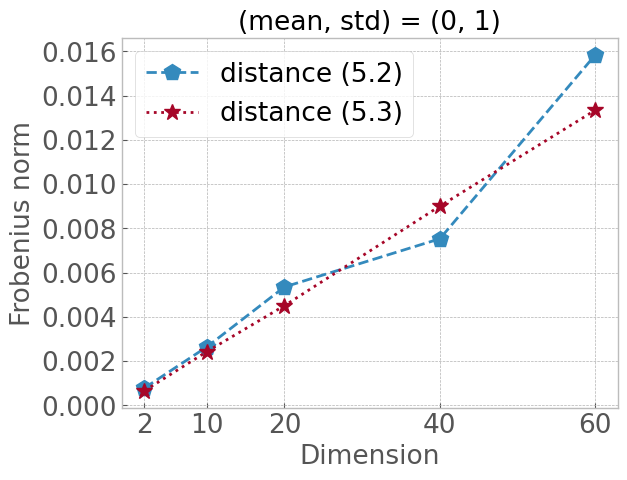

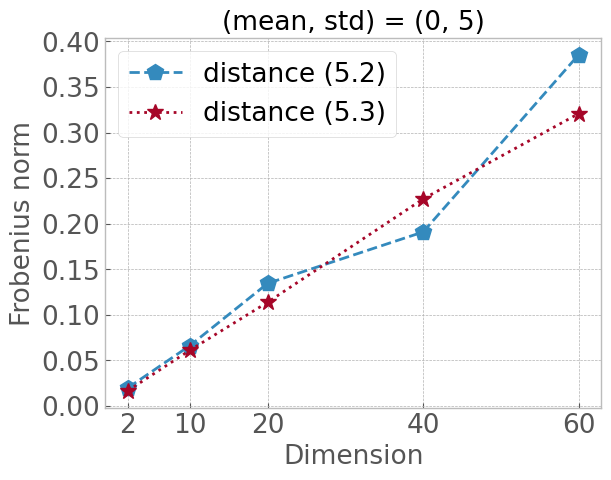

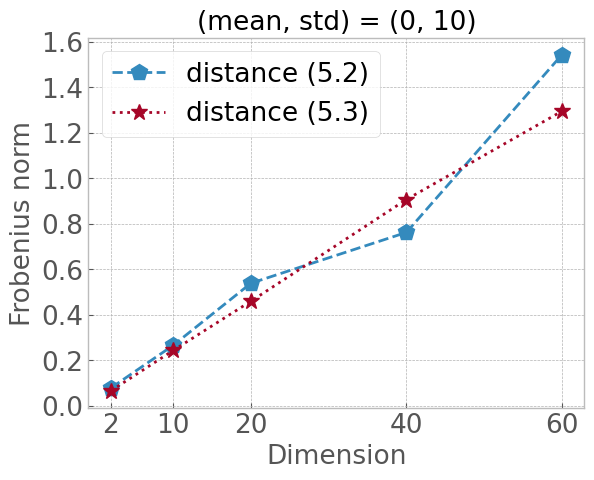

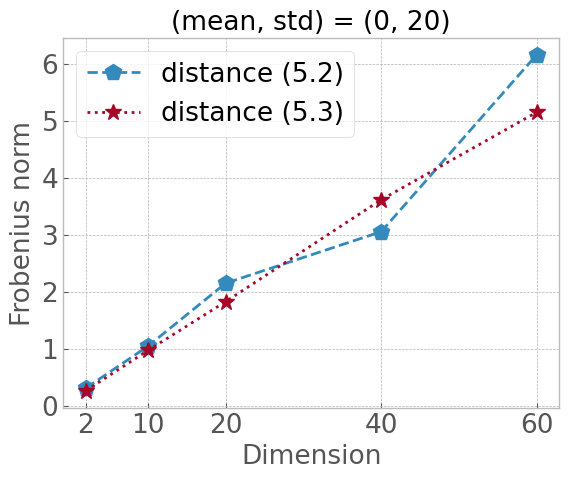

In [5]:
plt.style.use('ggplot')
plt.style.use('bmh')

titles = ['(mean, std) = (0, 1)', '(mean, std) = (0, 5)', '(mean, std) = (0, 10)', '(mean, std) = (0, 20)']
for j in range(4):
    plt.rcParams['axes.facecolor'] = 'white'
    plt.plot(dimensions, dist1[j, :], label='distance (5.2)', marker='p', linewidth=2, linestyle='--', markersize=12)
    plt.plot(dimensions, dist2[j, :], label='distance (5.3)', marker='*', linewidth=2, linestyle=':', markersize=12)
    plt.title(titles[j], fontsize=fontsize)
    plt.grid(True)
    plt.xticks(dimensions, fontsize=fontsize);
    plt.yticks(fontsize=fontsize);
    plt.legend(fontsize=fontsize)
    plt.xlabel("Dimension", fontsize=fontsize)
    plt.ylabel("Frobenius norm", fontsize=fontsize)
    plt.savefig('results/'+titles[j]+'_ft32.pdf')
    plt.show()

In [ ]:
LOW_PREC = chop(prec='q52', rmode=1)

dimensions = [2, 10, 20, 40, 60]
dist1 = np.zeros((4, len(dimensions)))
dist2 = np.zeros((4, len(dimensions)))
err1 = np.zeros((4, len(dimensions)))

for i in tqdm(range(len(dimensions))):
    ii = dimensions[i]
    for seed in sample_seeds:
        np.random.seed(seed)
        data1 = np.random.normal(0, 1, size=(size, ii))
        data2 = np.random.normal(0, 5, size=(size, ii))
        data3 = np.random.normal(0, 10, size=(size, ii))
        data4 = np.random.normal(0, 20, size=(size, ii))

        data = [data1, data2, data3, data4]
        for d in range(4):
            dd = data[d]
            pd1 = pairwise_q1(dd, dd)
            pd2 = pairwise_q2(dd, dd)
            pd3 = pairwise_low_prec_q1(dd, dd, LOW_PREC)
            pd4 = pairwise_low_prec_q2(dd, dd, LOW_PREC)

            err1[d, i] +=  LA.norm(pd2 - pd1, 'fro')/(len(sample_seeds))
            dist1[d, i] += LA.norm(pd3 - pd1, 'fro')/(len(sample_seeds))
            dist2[d, i] += LA.norm(pd4 - pd1, 'fro')/(len(sample_seeds))
            

 80%|████████  | 4/5 [16:17<05:05, 305.34s/it]

In [ ]:
plt.style.use('ggplot')
plt.style.use('bmh')

titles = ['(mean, std) = (0, 1)', '(mean, std) = (0, 5)', '(mean, std) = (0, 10)', '(mean, std) = (0, 20)']
for j in range(4):
    plt.rcParams['axes.facecolor'] = 'white'
    plt.plot(dimensions, dist1[j, :], label='distance (5.2)', marker='p', linewidth=2, linestyle='--', markersize=12)
    plt.plot(dimensions, dist2[j, :], label='distance (5.3)', marker='*', linewidth=2, linestyle=':', markersize=12)
    plt.title(titles[j], fontsize=fontsize)
    plt.grid(True)
    plt.xticks(dimensions, fontsize=fontsize);
    plt.yticks(fontsize=fontsize);
    plt.legend(fontsize=fontsize)
    plt.xlabel("Dimension", fontsize=fontsize)
    plt.ylabel("Frobenius norm", fontsize=fontsize)
    plt.savefig('results/'+titles[j]+'_ft8.pdf')
    plt.show()

In [ ]:
plt.style.use('ggplot')
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
titles = ['(mean, std) = (0, 1)', '(mean, std) = (0, 5)', '(mean, std) = (0, 10)', '(mean, std) = (0, 20)']
markers = ['P', 'x', '+', '*']

for j in range(4):
    plt.plot(dimensions, err1[j, :], marker=markers[j], linewidth=2, linestyle='--', markersize=12, label=titles[j])
    # plt.title(titles[j], fontsize=18)
    
plt.grid(True)
plt.xticks(dimensions, fontsize=13);
plt.yticks(fontsize=13);
plt.xlabel("Dimension", fontsize=13)
plt.ylabel("Frobenius norm", fontsize=13)

plt.legend(fontsize=13)
plt.savefig('results/err_work.pdf', bbox_inches='tight')
plt.show()